# Mercedes-Benz Greener Manufacturing

## Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.



For this project, the challenges are to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. 
I works with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. 

##### Models are evaluated on the R^2 value, also called the coefficient of determination.

### Following actions are performed:
- If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
- Check for null and unique values for test and train sets.
- Apply label encoder.
- Perform dimensionality reduction.
- Predict your test_df values using XGBoost.

### Data Description:
This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display. 

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

### File descriptions:
Variables with letters are categorical. Variables with 0/1 are binary values.

- train.csv: the training set
- test.csv: the test set, you must predict the 'y' variable for the 'ID's in this file


In [28]:
import pandas as pd
import numpy as np

In [29]:
merc_train = pd.read_csv('./Dataset for the project/train.csv')
merc_train.head()
print(merc_train.shape)

(4209, 378)


In [30]:
merc_train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [31]:
merc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


## Data Wrangling
- #### Check for variance of the columns, and drop those columns from the data
- #### Check for null and unique values for train set

In [32]:
def var_zero_cols(df):
    var_df=pd.DataFrame(df.var(),columns=['Variance'])
    return(list(var_df[var_df.Variance==0].index))

In [33]:
var_zero_cols(merc_train)

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [34]:
var_df=pd.DataFrame(merc_train.var(),columns=['Variance'])

In [35]:
# Above columns have zero variance, so dropping them from the data
merc_train.drop(columns=list(var_df[var_df.Variance==0].index),inplace=True)
merc_train.shape

(4209, 366)

In [36]:
# Check for null and unique values for train set
train_nullcheck_df=pd.DataFrame(merc_train.isna().any(),columns=['IsNull'])
train_nullcheck_df[train_nullcheck_df.IsNull==True]
train_merc_ucnt=pd.DataFrame(merc_train.nunique(),columns=['uniqueCount'])
train_merc_ucnt[train_merc_ucnt.uniqueCount>2]
train_merc_ucnt[train_merc_ucnt.uniqueCount<=2]

,uniqueCount
X10,2
X12,2
X13,2
X14,2
X15,2
...,...
X380,2
X382,2
X383,2
X384,2


#### All the above columns X0 to X8 are categorical data, so we need to transform them into numerical. Before that Lets look at categorical data and plot them to observe the impact on outcome

### Analyzing feature X0

In [38]:
merc_train.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
i      18
aq     18
am     18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
as     10
r      10
bc      6
ao      4
c       3
q       2
aa      2
g       1
ac      1
ab      1
Name: X0, dtype: int64

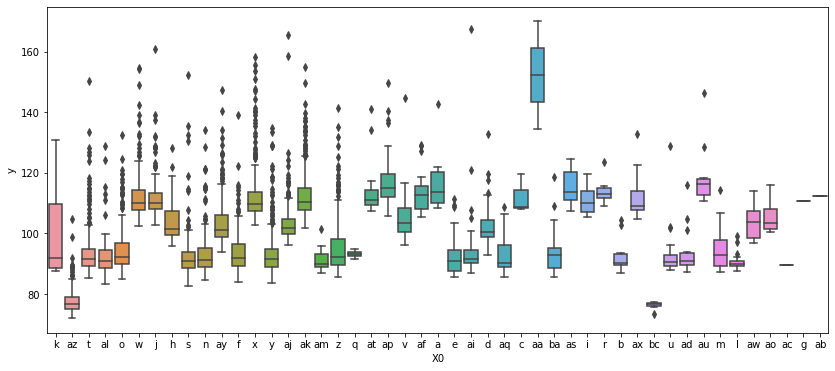

In [46]:
import matplotlib.pyplot as plt,seaborn as sns
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X0,y=merc_train.y)

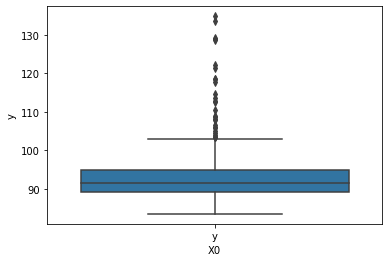

In [47]:
sns.boxplot(x=merc_train.X0[merc_train.X0=='y'],y=merc_train.y)

In [48]:
((merc_train[merc_train.X0=='y']['y']).sort_values(ascending=False))[:1].index.values

array([2375])

In [49]:
merc_train.shape

(4208, 366)

In [50]:
merc_train.drop(labels=((merc_train[merc_train.X0=='y']['y']).sort_values(ascending=False))[:1].index.values,inplace=True)

In [51]:
merc_train.shape

(4207, 366)

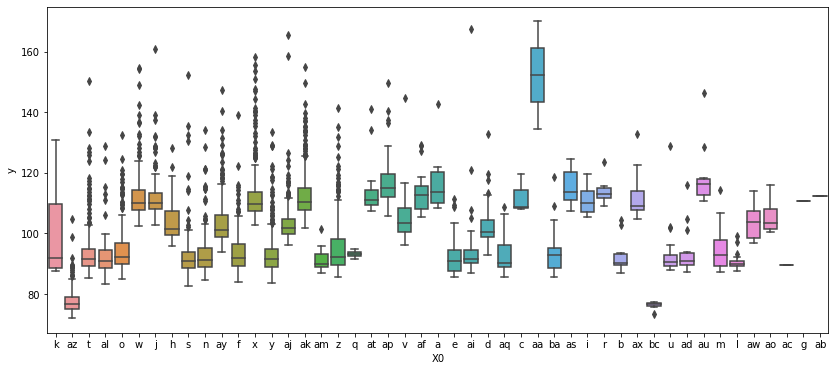

In [52]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X0,y=merc_train.y)

In [53]:
merc_train.X0.value_counts()

z     360
ak    349
y     322
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
i      18
aq     18
am     18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
as     10
r      10
bc      6
ao      4
c       3
q       2
aa      2
g       1
ac      1
ab      1
Name: X0, dtype: int64

In [61]:
def transform_X0(df):
    x0_grp=df.groupby('X0').count()['ID'].reset_index()
    df['X0'].replace(to_replace=x0_grp[x0_grp['ID']<100]['X0'].values
                            ,value='OT'
                            ,inplace=True)

In [62]:
transform_X0(merc_train)

In [63]:
merc_train.X0.value_counts()

OT    668
z     360
ak    349
y     322
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
Name: X0, dtype: int64

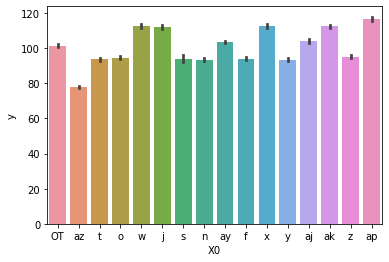

In [64]:
sns.barplot(x=merc_train.X0,y=merc_train.y)

### Analyzing feature X1

In [66]:
merc_train.X1.value_counts()

aa    833
s     598
b     591
l     590
v     408
r     250
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
f      23
y      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64

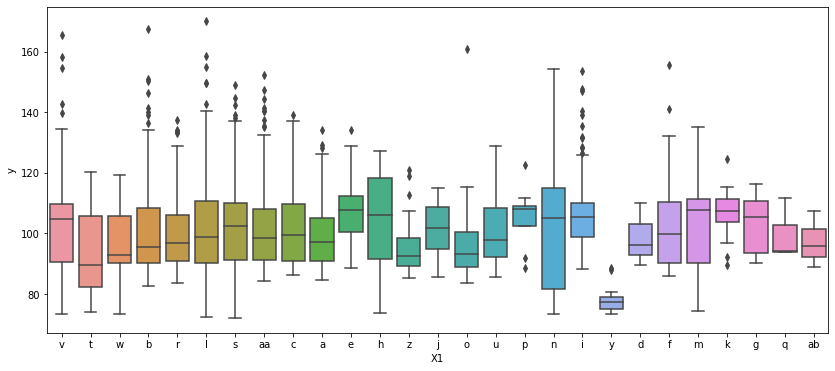

In [67]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X1,y=merc_train.y)

In [68]:
def transform_X1(df):
    x1_grp=df.groupby('X1').count()['ID'].reset_index()
    df['X1'].replace(to_replace=x1_grp[x1_grp['ID']<100]['X1'].values
                            ,value='OT'
                            ,inplace=True)

In [69]:
transform_X1(merc_train)

In [70]:
merc_train.X1.value_counts()

aa    833
s     598
b     591
l     590
OT    470
v     408
r     250
i     203
a     143
c     121
Name: X1, dtype: int64

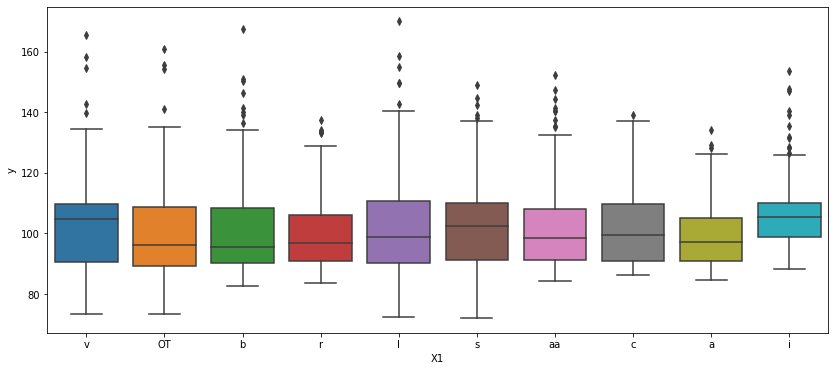

In [71]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X1,y=merc_train.y)

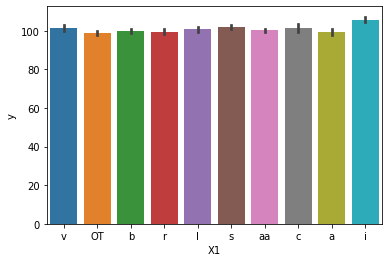

In [72]:
sns.barplot(x=merc_train.X1,y=merc_train.y)

### Analyzing feature X3

In [73]:
merc_train.X3.value_counts()

c    1941
f    1075
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

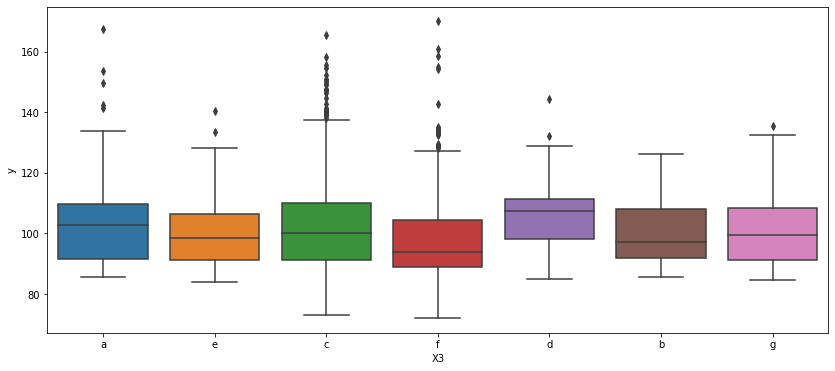

In [74]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X3,y=merc_train.y)

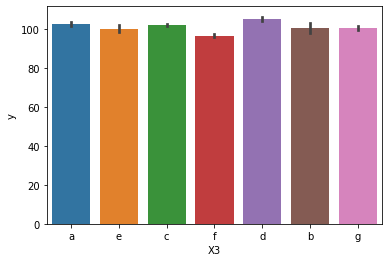

In [75]:
sns.barplot(x=merc_train.X3,y=merc_train.y)

In [76]:
# There are not too many labels, so leaving the data as is

### Analyzing feature X4

In [77]:
merc_train.X4.value_counts()

d    4203
a       2
b       1
c       1
Name: X4, dtype: int64

### It is evident from the above counts that X4 is 'd' in more than 99% of the cases, so transforming the data to d, ~d

In [78]:
merc_train[merc_train.X4!='d']['X4'].values

array(['b', 'c', 'a', 'a'], dtype=object)

In [79]:
def transform_X4(df):
    df['X4'].replace(to_replace=df[df.X4!='d']['X4'].values
                    ,value='~d'
                    ,inplace=True)

In [80]:
transform_X4(merc_train)

In [81]:
merc_train.X4.value_counts()

d     4203
~d       4
Name: X4, dtype: int64

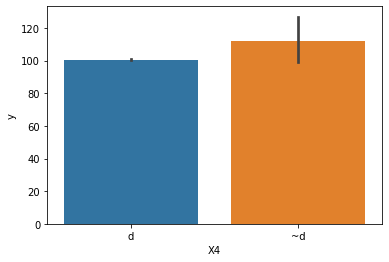

In [82]:
sns.barplot(x=merc_train.X4,y=merc_train.y)

### Analyzing feature X5

In [84]:
merc_train.X5.value_counts()

v     231
w     231
q     220
r     215
d     214
s     214
n     211
p     208
m     208
i     207
ae    205
ag    203
ac    200
ab    197
l     195
af    188
ad    185
k     177
c     131
j     125
aa    112
ah     97
o      20
f       7
x       2
h       1
u       1
g       1
y       1
Name: X5, dtype: int64

In [85]:
def transform_X5(df):
    x5_grp=df.groupby('X5').count()['ID'].reset_index()
    df['X5'].replace(to_replace=x5_grp[x5_grp['ID']<100]['X5'].values
                    ,value='OT'
                    ,inplace=True)

In [86]:
transform_X5(merc_train)

In [87]:
merc_train.X5.value_counts()

w     231
v     231
q     220
r     215
s     214
d     214
n     211
m     208
p     208
i     207
ae    205
ag    203
ac    200
ab    197
l     195
af    188
ad    185
k     177
c     131
OT    130
j     125
aa    112
Name: X5, dtype: int64

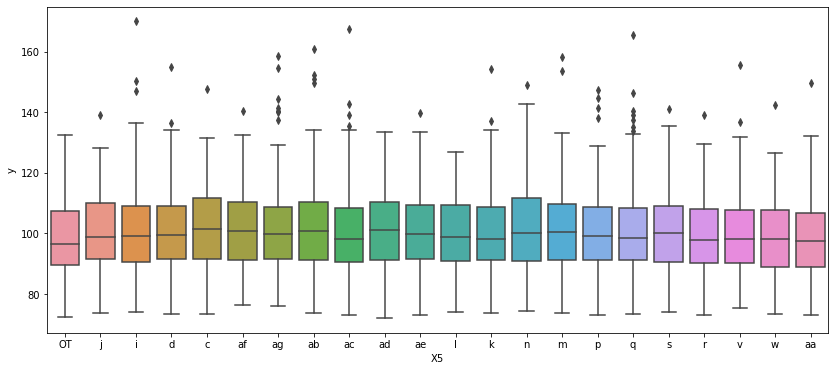

In [88]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X5,y=merc_train.y)

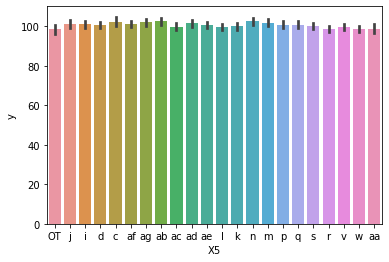

In [89]:
sns.barplot(x=merc_train.X5,y=merc_train.y)

### Analyzing feature X6

In [90]:
merc_train.X6.value_counts()

g    1041
j    1039
d     625
i     488
l     477
a     206
h     190
k      43
c      38
b      28
f      20
e      12
Name: X6, dtype: int64

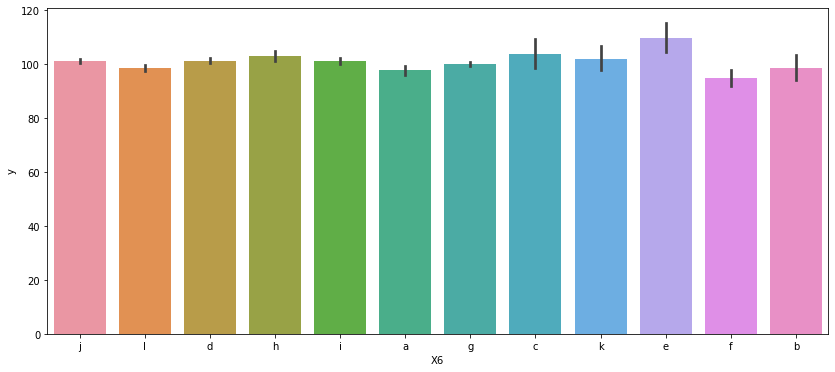

In [91]:
plt.figure(figsize=(14,6))
sns.barplot(x=merc_train.X6,y=merc_train.y)

### Analyzing feature X8

In [92]:
merc_train.X8.value_counts()

j    277
s    255
f    243
n    242
i    237
e    225
r    219
a    210
w    196
v    194
b    189
k    176
o    163
m    155
g    130
u    119
t    118
q    117
h    117
y    116
x    105
d    103
l    101
c    100
p    100
Name: X8, dtype: int64

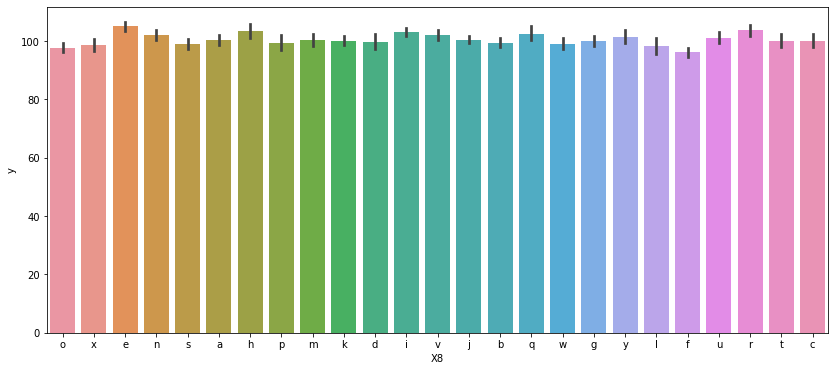

In [93]:
plt.figure(figsize=(14,6))
sns.barplot(x=merc_train.X8,y=merc_train.y)

From the above barplots on categorical features, it is evident that outcome(y) is not majorly impacted by these features



## Applying label encoder on categorical features to convert them to numerical

In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
x=merc_train.drop(columns='y')
y=merc_train.y

In [96]:
x.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,OT,v,at,a,d,OT,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,OT,OT,av,e,d,OT,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,OT,n,c,d,OT,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,OT,n,f,d,OT,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,OT,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
catCols=merc_train.select_dtypes(include="object").columns

In [98]:
catCols

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [99]:
def transform_labels(df,x):
    catCols=df.select_dtypes(include="object").columns
    le=LabelEncoder()
    for i in catCols:
        le.fit(x[i])
        x[i]=le.transform(x[i])

In [100]:
transform_labels(merc_train,x)

In [101]:
x.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,9,17,0,0,0,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,0,0,19,4,0,0,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,5,0,34,2,0,0,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,9,5,0,34,5,0,0,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,5,9,34,5,0,0,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
stdsclr=StandardScaler()
stdsclr.fit(x)

StandardScaler()

In [104]:
x_std=stdsclr.transform(x)

#### From the above barplots, we can say that categorical features X1,X2,X3,X5,X7,X8 are not making much impact on the outcome, so considering PCA on X0,X4,X6

In [107]:
from sklearn.decomposition import PCA

In [108]:
pcaModel=PCA()

In [109]:
pcaModel.fit(x)

PCA()

In [110]:
pcaModel.explained_variance_ratio_

array([9.99955834e-01, 2.01995659e-05, 8.27180717e-06, 4.71378767e-06,
       4.10957576e-06, 1.56399165e-06, 1.35710972e-06, 6.84188010e-07,
       3.74982887e-07, 2.76507432e-07, 2.19718627e-07, 2.07768464e-07,
       1.83664875e-07, 1.51468711e-07, 1.31654379e-07, 1.15327579e-07,
       9.26627705e-08, 8.71669355e-08, 7.61418318e-08, 7.02740066e-08,
       6.33839180e-08, 5.82108640e-08, 5.65913588e-08, 5.12210933e-08,
       4.59429677e-08, 4.35569618e-08, 3.90014802e-08, 3.72571096e-08,
       3.40359329e-08, 3.22829593e-08, 3.13374097e-08, 2.88299724e-08,
       2.80445068e-08, 2.63666752e-08, 2.57304155e-08, 2.43748776e-08,
       2.23882835e-08, 2.08689854e-08, 1.93240969e-08, 1.86528905e-08,
       1.76477730e-08, 1.69596875e-08, 1.61863856e-08, 1.58911429e-08,
       1.54189679e-08, 1.51042880e-08, 1.36667688e-08, 1.33849243e-08,
       1.29544952e-08, 1.26449740e-08, 1.22607594e-08, 1.22162248e-08,
       1.17753703e-08, 1.13072766e-08, 1.06132206e-08, 1.02316119e-08,
      

In [113]:
pcaModel.explained_variance_ratio_.cumsum()*100

array([ 99.99558345,  99.9976034 ,  99.99843058,  99.99890196,
        99.99931292,  99.99946932,  99.99960503,  99.99967345,
        99.99971095,  99.9997386 ,  99.99976057,  99.99978135,
        99.99979971,  99.99981486,  99.99982803,  99.99983956,
        99.99984882,  99.99985754,  99.99986516,  99.99987218,
        99.99987852,  99.99988434,  99.99989   ,  99.99989512,
        99.99989972,  99.99990407,  99.99990797,  99.9999117 ,
        99.9999151 ,  99.99991833,  99.99992147,  99.99992435,
        99.99992715,  99.99992979,  99.99993236,  99.9999348 ,
        99.99993704,  99.99993913,  99.99994106,  99.99994292,
        99.99994469,  99.99994638,  99.999948  ,  99.99994959,
        99.99995113,  99.99995264,  99.99995401,  99.99995535,
        99.99995664,  99.99995791,  99.99995914,  99.99996036,
        99.99996153,  99.99996267,  99.99996373,  99.99996475,
        99.99996572,  99.99996668,  99.99996761,  99.99996853,
        99.99996942,  99.99997025,  99.99997107,  99.99

In [114]:
pcaModel.components_

array([[ 9.99998692e-01, -5.06754784e-05,  6.52533775e-05, ...,
        -1.56169905e-07, -1.37366006e-07,  4.49828918e-07],
       [ 9.75122492e-05, -4.31164878e-02,  3.61239216e-02, ...,
        -8.08815596e-05, -6.69854507e-06, -1.81096430e-05],
       [-3.39023973e-05,  2.69289143e-02, -1.40379696e-02, ...,
         2.09660479e-04,  2.81512075e-05,  2.32668064e-04],
       ...,
       [-0.00000000e+00, -1.14459811e-17,  8.72286334e-18, ...,
        -5.03069808e-17, -5.18248638e-17,  3.00550245e-02],
       [-0.00000000e+00,  8.98990241e-19,  3.80574730e-19, ...,
        -2.58985410e-18, -2.80664344e-21,  3.00216735e-17],
       [ 0.00000000e+00, -1.43954943e-15, -3.86095532e-16, ...,
        -1.21172386e-13, -1.48183115e-13,  6.02435091e-03]])

#### When included ID, ID feature alone is able to explain 99%, but removing ID

In [115]:
pcaModel=PCA(n_components=120)

In [116]:
x.drop(columns=['ID'],inplace=True)

In [117]:
pcaModel.fit(x)

PCA(n_components=120)

In [118]:
x_pca=pd.DataFrame(pcaModel.transform(x))

In [119]:
pcaModel.explained_variance_ratio_.cumsum()*100

array([43.20282156, 60.89115572, 75.22447101, 85.30062774, 88.64466392,
       91.54630871, 93.01061418, 93.81255563, 94.40378631, 94.87368225,
       95.31828019, 95.71149984, 96.03614549, 96.31764336, 96.56440489,
       96.76283087, 96.94915922, 97.11277786, 97.26300386, 97.39855033,
       97.52330848, 97.64434536, 97.75395671, 97.85224199, 97.94589747,
       98.02939568, 98.10905126, 98.1818174 , 98.25115358, 98.31814291,
       98.37977512, 98.43972901, 98.49610814, 98.55126344, 98.60347657,
       98.65137927, 98.69601766, 98.73735695, 98.77736422, 98.81510004,
       98.85149341, 98.88616659, 98.92018839, 98.95319421, 98.98584932,
       99.01507058, 99.04383597, 99.07153896, 99.0985926 , 99.12486474,
       99.15097818, 99.1762034 , 99.20037396, 99.22306917, 99.2449455 ,
       99.26579457, 99.28631495, 99.30631285, 99.32593575, 99.34484435,
       99.36259266, 99.38014009, 99.39673155, 99.41325536, 99.42858607,
       99.44356352, 99.45805123, 99.4724448 , 99.48602744, 99.49

In [120]:
pcaModel.components_

array([[-4.27148308e-02,  3.56767785e-02,  9.92940396e-01, ...,
        -7.99506372e-05, -6.11403423e-06, -2.10622583e-05],
       [ 2.56252910e-02, -1.29151594e-02,  7.85310314e-02, ...,
         2.07552604e-04,  2.81303111e-05,  2.39835505e-04],
       [ 3.82993695e-02, -2.88120323e-02, -6.39122329e-03, ...,
         5.12131482e-05, -1.92171213e-05, -1.87536071e-04],
       ...,
       [-2.29694376e-03, -2.53903629e-03, -6.64990464e-04, ...,
        -1.58748099e-02,  1.25559310e-02,  1.24152356e-02],
       [-2.85429087e-03, -1.83798282e-03, -1.08402244e-03, ...,
         6.91405961e-03, -7.07227763e-03,  5.67479721e-02],
       [-1.21958157e-04,  1.29187429e-03, -3.33344207e-04, ...,
         1.34284593e-02,  7.64677777e-03,  2.82768060e-02]])

In [121]:
pcaModel.components_

array([[-4.27148308e-02,  3.56767785e-02,  9.92940396e-01, ...,
        -7.99506372e-05, -6.11403423e-06, -2.10622583e-05],
       [ 2.56252910e-02, -1.29151594e-02,  7.85310314e-02, ...,
         2.07552604e-04,  2.81303111e-05,  2.39835505e-04],
       [ 3.82993695e-02, -2.88120323e-02, -6.39122329e-03, ...,
         5.12131482e-05, -1.92171213e-05, -1.87536071e-04],
       ...,
       [-2.29694376e-03, -2.53903629e-03, -6.64990464e-04, ...,
        -1.58748099e-02,  1.25559310e-02,  1.24152356e-02],
       [-2.85429087e-03, -1.83798282e-03, -1.08402244e-03, ...,
         6.91405961e-03, -7.07227763e-03,  5.67479721e-02],
       [-1.21958157e-04,  1.29187429e-03, -3.33344207e-04, ...,
         1.34284593e-02,  7.64677777e-03,  2.82768060e-02]])

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,random_state=10,train_size=0.75)

In [127]:
from xgboost import XGBRegressor,plot_importance

In [128]:
xgbModel=XGBRegressor(max_depth=3, min_child_weight=4, reg_lambda=1000, gamma = 100)

Tried different values of lambda like 10,100,1000, observed scores improvement for higher values of lambda, so will be performing grid search with high values

In [130]:
xgbModel.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=100, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1000, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
xgbModel.score(x_train,y_train)

0.6586154645519323

In [132]:
xgbModel.score(x_test,y_test)

0.5205215213749481

Above model is overfit, so now trying with PCA only on categorical features

### PCA on categorical features, tried with same number of components, and observed 99.99% variance ratio is achieved by 7 components, so fixed n_components to 7

In [133]:
pcaModel=PCA(n_components=7)
pcaModel.fit(x.iloc[:,0:9])
x_pca_c=pd.DataFrame(pcaModel.transform(x.iloc[:,0:9]),columns=['C1','C2','C3','C4','C5','C6','C7'])

In [134]:
pd.DataFrame(pcaModel.components_,columns=(x.iloc[:,0:9]).columns)

,X0,X1,X2,X3,X4,X5,X6,X8,X10
0,-0.041994,0.035567,0.995136,-0.014716,0.000004,-0.012572,0.018459,-0.077206,0.000410
1,0.025099,-0.012323,0.079037,-0.004088,0.000014,0.050121,0.012961,0.995125,0.000352
2,0.036129,-0.028227,-0.006492,-0.001551,0.000195,-0.997632,0.012265,0.049336,0.000198
3,0.987602,-0.137071,0.043775,-0.035697,-0.000073,0.037979,0.013142,-0.032315,0.002061
4,0.095537,0.579593,0.000483,0.083113,0.000052,-0.022139,-0.804518,0.016666,-0.004392
5,-0.106839,-0.794959,0.033837,-0.065469,0.000253,0.011075,-0.592505,-0.002946,0.000470
6,0.019983,-0.105341,0.018813,0.993623,-0.000288,0.002409,0.029063,0.000278,0.003536


In [135]:
pcaModel.explained_variance_ratio_.cumsum()

array([0.46844614, 0.66096061, 0.81698729, 0.92338376, 0.95782916,
       0.98855397, 0.99994621])

In [136]:
x_pca_c=pd.concat([x_pca_c,merc_train.ID],axis=1)

In [137]:
x_non_pca=pd.concat([x.iloc[:,9:],merc_train.ID],axis=1)

In [138]:
x_pca=pd.merge(left=x_pca_c,right=x_non_pca,on='ID',how='inner')

In [139]:
x_pca.drop(columns=['ID'],inplace=True)

In [140]:
x_pca

,C1,C2,C3,C4,C5,C6,C7,X12,X13,X14,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.193327,1.594885,10.920466,-8.118792,0.214146,-4.077209,-3.489872,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1.841548,1.873433,11.179854,-6.914102,-6.277809,1.698214,1.528442,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,15.856278,12.122858,11.685712,-1.565185,-4.200067,2.961009,-0.132317,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,17.315957,-6.770865,10.768200,-1.032015,-5.876418,1.635576,2.901396,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16.793541,1.970668,10.860060,-2.661626,5.926057,-0.805536,1.723326,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4202,21.711301,-6.635164,9.328592,-4.902609,2.640128,-1.762248,-3.142389,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4203,7.570811,8.278180,10.240145,-7.802556,-2.056790,-3.735550,1.901634,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4204,-15.154643,8.853562,10.966916,6.025165,3.172222,-2.929518,-1.338146,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Defining a function to perform PCA on categorical features using the above approach

In [141]:
def perform_pca(df,x):
    pcaModel=PCA(n_components=7)
    pcaModel.fit(x.iloc[:,0:9])
    x_pca_c=pd.DataFrame(pcaModel.transform(x.iloc[:,0:9]),columns=['C1','C2','C3','C4','C5','C6','C7'])
    x_pca_c=pd.concat([x_pca_c,df.ID],axis=1)
    x_non_pca=pd.concat([x.iloc[:,9:],df.ID],axis=1)
    x_pca=pd.merge(left=x_pca_c,right=x_non_pca,on='ID',how='inner')
    x_pca.drop(columns=['ID'],inplace=True)
    return x_pca

In [142]:
x_pca=perform_pca(merc_train,x)

In [143]:
x_pca.head()

,C1,C2,C3,C4,C5,C6,C7,X12,X13,X14,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.193327,1.594885,10.920466,-8.118792,0.214146,-4.077209,-3.489872,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1.841548,1.873433,11.179854,-6.914102,-6.277809,1.698214,1.528442,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,15.856278,12.122858,11.685712,-1.565185,-4.200067,2.961009,-0.132317,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,17.315957,-6.770865,10.768200,-1.032015,-5.876418,1.635576,2.901396,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16.793541,1.970668,10.860060,-2.661626,5.926057,-0.805536,1.723326,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,random_state=10,train_size=0.75)
xgbModel=XGBRegressor(max_depth=4, min_child_weight=5, reg_lambda=100, gamma = 200)
xgbModel.fit(x_train,y_train)
print(xgbModel.score(x_train,y_train))
print(xgbModel.score(x_test,y_test))

0.6387669906256734
0.5616967173499763


#### Grid Search with cv=5

In [145]:
from sklearn.model_selection import GridSearchCV

In [148]:
param_grid = {'reg_lambda': [100,200,500],  
              'gamma':[100, 150, 200],
              'min_child_weight':[4,5,6]
             }
grid = GridSearchCV(XGBRegressor(), param_grid, refit = True, verbose = 3, cv=5) 
grid.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ..gamma=100, min_child_weight=4, reg_lambda=100; total time=   2.8s
[CV 2/5] END ..gamma=100, min_child_weight=4, reg_lambda=100; total time=   2.9s
[CV 3/5] END ..gamma=100, min_child_weight=4, reg_lambda=100; total time=   2.7s
[CV 4/5] END ..gamma=100, min_child_weight=4, reg_lambda=100; total time=   3.0s
[CV 5/5] END ..gamma=100, min_child_weight=4, reg_lambda=100; total time=   3.1s
[CV 1/5] END ..gamma=100, min_child_weight=4, reg_lambda=200; total time=   3.1s
[CV 2/5] END ..gamma=100, min_child_weight=4, reg_lambda=200; total time=   3.2s
[CV 3/5] END ..gamma=100, min_child_weight=4, reg_lambda=200; total time=   2.8s
[CV 4/5] END ..gamma=100, min_child_weight=4, reg_lambda=200; total time=   3.1s
[CV 5/5] END ..gamma=100, min_child_weight=4, reg_lambda=200; total time=   3.0s
[CV 1/5] END ..gamma=100, min_child_weight=4, reg_lambda=500; total time=   3.1s
[CV 2/5] END ..gamma=100, min_child_weight=4, r

[CV 2/5] END ..gamma=200, min_child_weight=4, reg_lambda=500; total time=   3.4s
[CV 3/5] END ..gamma=200, min_child_weight=4, reg_lambda=500; total time=   3.9s
[CV 4/5] END ..gamma=200, min_child_weight=4, reg_lambda=500; total time=   4.2s
[CV 5/5] END ..gamma=200, min_child_weight=4, reg_lambda=500; total time=   3.3s
[CV 1/5] END ..gamma=200, min_child_weight=5, reg_lambda=100; total time=   3.5s
[CV 2/5] END ..gamma=200, min_child_weight=5, reg_lambda=100; total time=   3.4s
[CV 3/5] END ..gamma=200, min_child_weight=5, reg_lambda=100; total time=   3.7s
[CV 4/5] END ..gamma=200, min_child_weight=5, reg_lambda=100; total time=   3.8s
[CV 5/5] END ..gamma=200, min_child_weight=5, reg_lambda=100; total time=   3.1s
[CV 1/5] END ..gamma=200, min_child_weight=5, reg_lambda=200; total time=   3.6s
[CV 2/5] END ..gamma=200, min_child_weight=5, reg_lambda=200; total time=   3.7s
[CV 3/5] END ..gamma=200, min_child_weight=5, reg_lambda=200; total time=   3.8s
[CV 4/5] END ..gamma=200, mi

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [149]:
grid.best_params_

{'gamma': 200, 'min_child_weight': 4, 'reg_lambda': 200}

In [150]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=200, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=200, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [151]:
xgbModel_final=XGBRegressor(max_depth=4, min_child_weight=4, reg_lambda=100, gamma=150)

In [152]:
xgbModel_final.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=150, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=100, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
xgbModel_final.score(x_train,y_train)

0.6560073025973242

In [154]:
xgbModel_final.score(x_test,y_test)

0.5604826109581964

In [155]:
xgb_feature_imp=(pd.DataFrame(xgbModel_final.feature_importances_,index=x_pca.columns))

In [156]:
xgb_feature_imp.sort_values(by=0)#,ascending=False)

,0
X192,0.000000
X252,0.000000
X251,0.000000
X249,0.000000
X248,0.000000
...,...
X276,0.011642
X118,0.075097
X127,0.116549
X29,0.229968


Important observation here is, Feature importance is 0 for 311 features.

## Predicting outcome on test data

In [158]:
merc_test = pd.read_csv('./Dataset for the project/test.csv')

In [159]:
merc_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [160]:
var_zero_cols(merc_test)

['X257', 'X258', 'X295', 'X296', 'X369']

#### Dropping zero variance features of training set, from test set, as the above model is not trained on those features

In [161]:
merc_test.drop(columns=['X297', 'X11', 'X290', 'X293', 'X268', 'X233', 'X93', 'X289', 'X235', 'X107', 'X330', 'X347'],inplace=True)

In [162]:
transform_X0(merc_test)
transform_X4(merc_test)
transform_X1(merc_test)
transform_X5(merc_test)

In [163]:
x=merc_test.drop(columns=['ID'])

In [164]:
transform_labels(merc_test,x)

In [165]:
x.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,5,9,34,5,0,0,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,11,3,8,0,0,0,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5,9,17,5,0,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,5,6,34,5,0,0,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,12,8,17,2,0,0,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [166]:
x_pca_t=perform_pca(merc_test,x)

In [167]:
x_pca_t.shape

(4209, 362)

In [168]:
merc_test_pred=pd.DataFrame(xgbModel_final.predict(x_pca_t),columns=['y'])

In [169]:
merc_test_pred['ID']=merc_test.ID

In [170]:
merc_test_pred.tail(10)

,y,ID
4199,90.943039,8401
4200,92.710258,8404
4201,95.110573,8407
4202,112.974937,8408
4203,110.726929,8409
4204,104.527763,8410
4205,91.629471,8411
4206,91.228050,8413
4207,113.062805,8414
4208,91.553360,8416


In [171]:
merc_test_pred

,y,ID
0,77.738129,1
1,91.810814,2
2,78.489426,3
3,77.821465,4
4,112.510063,5
...,...,...
4204,104.527763,8410
4205,91.629471,8411
4206,91.228050,8413
4207,113.062805,8414
